<a href="https://colab.research.google.com/github/dataSci-rigo/w210/blob/master/Humorbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json
import uuid
import pandas as pd
import numpy as np

In [0]:
project_id = 'Humorbot'
bucket_name = 'humordata-' + str(uuid.uuid1())

In [0]:
#authenticate
from google.colab import auth
auth.authenticate_user()

In [0]:
# To load files from local 
#from google.colab import files
#uploaded = files.upload()


Saving reddit_jokes_2017.json to reddit_jokes_2017.json


In [0]:
#copy to bucket
#!gsutil cp reddit_jokes_2017.json gs://humordata/

Copying file://reddit_jokes_2017.json [Content-Type=application/json]...
\
Operation completed over 1 objects/65.5 MiB.                                     


In [0]:
#load file from gcp

!gsutil cp gs://humordata/reddit_jokes_2017.json /tmp/reddit_jokes_2017.json


Copying gs://humordata/reddit_jokes_2017.json...
- [1 files][ 65.5 MiB/ 65.5 MiB]                                                
Operation completed over 1 objects/65.5 MiB.                                     


In [0]:
jokes_2017 = pd.read_json('/tmp/reddit_jokes_2017.json')
jokes_2017 = jokes_2017.set_index('id')
jokes_2017 = jokes_2017.rename(columns={'title':'setup', 'body':'punchline'})
jokes_2017['len_punchline'] = jokes_2017['punchline'].apply(lambda x: len(x.split()))
jokes_2017['len_setup'] = jokes_2017['setup'].apply(lambda x: len(x.split()))
jokes_2017.head()


,punchline,score,setup,len_punchline,len_setup
id,,,,,
5tz52q,"Now I have to say ""Leroy can you please paint ...",1,I hate how you cant even say black paint anymore,12,10
5tz4dd,Pizza doesn't scream when you put it in the ov...,0,What's the difference between a Jew in Nazi Ge...,14,12
5tz319,...and being there really helped me learn abou...,0,I recently went to America....,34,5
5tz2wj,A Sunday school teacher is concerned that his ...,1,"Brian raises his hand and says, “He’s in Heaven.”",92,9
5tz1pc,He got caught trying to sell the two books to ...,0,You hear about the University book store worke...,12,17


In [0]:
jokes_2017[jokes_2017['score']==48526].values

array([['On the condition he gets to install windows.\n\n\n', 48526,
        "Breaking News: Bill Gates has agreed to pay for Trump's wall",
        8, 11]], dtype=object)

In [0]:
jokes_2017['score'].count()

194553

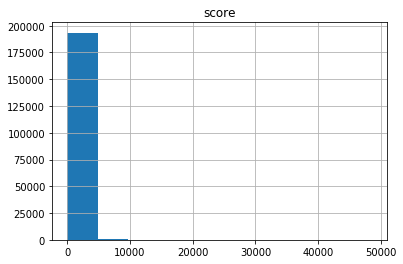

In [0]:
jokes_2017.hist(column='score')
pass

In [0]:
jokes_2017['score'].value_counts()

0       61561
1       19347
2       13684
3        9626
4        7421
        ...  
9909        1
1969        1
4144        1
6193        1
2047        1
Name: score, Length: 3639, dtype: int64

2       14235
5       13100
4       12445
6       12416
3       12292
        ...  
1061        1
1189        1
1748        1
1492        1
1151        1
Name: len_punchline, Length: 956, dtype: int64

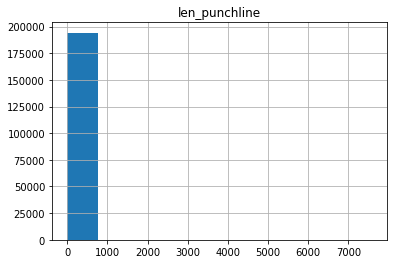

In [0]:
jokes_2017.hist(column='len_punchline')
jokes_2017['len_punchline'].value_counts()

7     23731
8     20795
6     20621
9     20423
10    16481
      ...  
59        2
63        1
64        1
58        1
66        1
Name: len_setup, Length: 62, dtype: int64

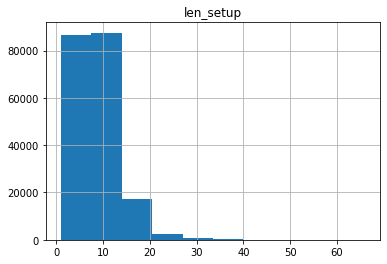

In [0]:
jokes_2017.hist(column='len_setup')
jokes_2017['len_setup'].value_counts()

In [0]:
jokes_2017[jokes_2017['score']==0]['score'].count()/jokes_2017['score'].count()

0.3164227742568863

In [0]:
jokes_2017[jokes_2017['score']==jokes_2017['score'].max()].values

array([['On the condition he gets to install windows.\n\n\n', 48526,
        "Breaking News: Bill Gates has agreed to pay for Trump's wall",
        8, 11]], dtype=object)

In [0]:
jokes_2017['score'].max()

48526